<a href="https://colab.research.google.com/github/solozano0725/diplomadoMLNivel1/blob/main/DipMLsesion11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

# **Diplomado de Análisis de datos y Machine Learning en Python**


El presente diplomado hace parte del centro de Big Data de la facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.

## **Sesión 11**

## **Contenido**

- <a href="#apr"> Aprendizaje supervisado</a><br>
  - <a href="#reg"> Regresión lineal simple</a><br>
- <a href="#skl"> Introducción a Sklearn</a><br>
  - <a href="#cla"> Clases </a><br>
  - <a href="#int"> Interfaces de Sklearn </a><br>

<p><a name="apr"></a></p>

# **Aprendizaje supervisado**

Existen conceptos clave que sientan las bases para una mejor comprensión del ML. Veamos la nomenclatura (términos estándar) que se utiliza para describir los datos, así como los términos utilizados para describir el aprendizaje y el modelado.

La estructura tradicional para los datos en el campo del ML tienen la siguiente forma:

![picture](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2013/12/Table-of-Data-Showing-an-Instance-Feature-and-Train-Test-Datasets.png)

* **Instancia**: A una sola fila de datos se le llama instancia. También se le conoce como una observación, registro o ejemplo.
* **Característica**: A una sola columna de datos se le llama característica. Algunas características pueden ser entradas a un modelo, conocidas como predictoras, y otras pueden ser salidas o las características a predecir, conocidas como **etiquetas**.
* **Datos de entrenamiento**: Conjunto de datos que introducimos al algoritmo para entrenar el modelo.
* **Datos de prueba**: Conjunto de datos que utilizamos para validar la precisión del modelo pero que no se utiliza para entrenarlo.






En el aprendizaje supervisado, los datos de entrada con los que alimentamos el algoritmo incluyen las soluciones deseadas (**etiquetas**). Una tarea típica es la de la **regresión**, donde las etiquetas tienen una naturaleza continua.

<p><a name="reg"></a></p>

## **Regresión lineal simple**

**Problema**: Predecir las emisiones de CO2 a partir del conjunto de datos `FuelConsumption.csv`

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

df = pd.read_csv("https://raw.githubusercontent.com/diplomadomludea/nivel_1/master/data/FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.shape

(1067, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


Note que este es un problema de **aprendizaje supervisado**: Los datos de entrada incluyen las *etiquetas*. Como la variable a predecir es una etiqueta continua, entonces la tarea es de regresión.

Para resolver el problema podemos construir un modelo lineal simple. En el caso de la regresión lineal, el modelo $\hat{y}$ es una función lineal de las características predictoras $X$

$$\hat{y}(X) = w_0 + w_1 x_1 + \cdots + w_n x_n = W^T \cdot X $$

donde 

$$W =
 \begin{pmatrix}
  w_0 \\
  w_1 \\
  \vdots \\
  w_n
 \end{pmatrix}$$

son los parámetros (pesos) del modelo. De manera más general, un modelo lineal hace una predicción calculando una suma pesada de las características de entrada, más una constante conocida como el término de *sesgo* $w_0$.

Para simplificar el problema, utilicemos una única característica predictora:







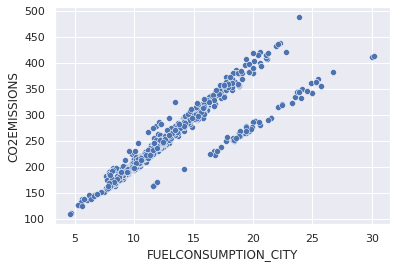

In [ ]:
sns.scatterplot(data=df, x="FUELCONSUMPTION_CITY", y="CO2EMISSIONS");

En este caso el modelo toma la forma

$$\hat{y}(x_1) = w_0 + w_1 x_1$$

Identificamos esta expresión con una línea recta, donde $w_0$ representa el intercepto y $w_1$ la pendiente. Podemos definir muchos modelos, dependiendo de los valores que tomen estos parámetros

<p><img alt="Colaboratory logo" height="300px" src="https://i.imgur.com/U3GzGtz.png" align="center" hspace="10px" vspace="0px"></p> 

¿Cómo elegir los valores de $W$ de tal manera que obtengamos el mejor modelo posible?

**Estadística clásica:**

En el caso de la estadística clásica, lo que se hace es minimizar una *test statistics* (u optimizar la verosimilitud)


$$\chi^2 = \sum_{i=0}^{n} \frac{\left(y_i-\hat{y}\right)^2}{\sigma_i}$$

donde $y_i$ son los valores observados y $\sigma_i$ sus varianzas asociadas. 



**ML**

En el ML, se realiza un proceso similar, donde la función a minimizar (en este caso el MSE) se conoce generalmente como **función de costo/pérdida**

$$J(W) =\frac{1}{n}\sum_{i=0}^{n} \left(y_i-\hat{y}\right)^2$$

El proceso de optimización que permite encontrar los parámetros $W$ que minimicen la función de costo/pérdida se conoce como **entrenamiento** del modelo. El proceso de optimización (minimización) tiene una solución cerrada conocida como la ecuación normal:








$$W=(X^{T}X)^{-1} X^{T}y$$

Estos métodos producen el mismo resultado, por lo que se podría suponer que son iguales. ¿Cuál es entonces la diferencia entre ambas aproximaciones al problema? La respuesta está en el propósito y en la forma de validación de los modelos

En el caso del ML utilizamos un subconjunto de los datos para el proceso de *entrenamiento* del modelo. Posterior al entrenamiento, se utiliza un subconjunto de los datos diferente, que denominamos como conjunto de prueba/validación, para validar la precisión del modelo. **El objetivo del ML es obtener el mejor rendimiento posible del modelo sobre el conjunto de prueba.**

Respecto al propósito, los modelos de ML están diseñados en su mayoría para realizar predicciones: Una vez los modelos son entrenados y validados, pueden ser utilizados para estimar valores de la variable objetivo dados nuevos valores de las variables predictoras. 

Por otro lado, los modelos estadísticos están diseñados para caracterizar la relación entre los datos (*inferencia estadística*). Sin embargo, todavía podemos usar este modelo estadístico para hacer predicciones, y este puede ser incluso su propósito principal, pero la forma en que se evalúa el modelo no implicará conjuntos de entrenamiento y prueba como en el caso del ML, sino que implicará evaluar la significancia y robustes de los parámetros del modelo mediante diferentes pruebas estadísticas que permitan evaluar la calidad del modelo.

**Ejercicio**

Usar la ecuacion normal
\begin{equation}
W = (X^T\cdot X)^{-1} \cdot X^T \cdot y
\end{equation}
para hallar los pesos $W$


In [ ]:
# matriz de caracteristicas
X = np.c_[np.ones(len(df)), df["FUELCONSUMPTION_CITY"]]

# variable objetivo
y = df["CO2EMISSIONS"]

# parametros del modelo
W = np.linalg.inv(X.T @ X) @ X.T @ y
W

array([71.7202284 , 13.87643376])

Visualicemos el modelo 

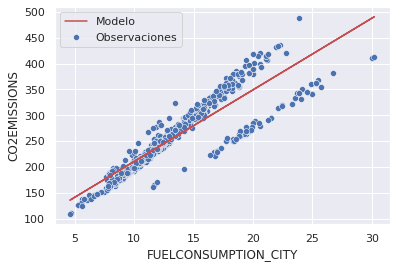

In [ ]:
modelo = W[0] + W[1]*X[:,1]

plt.plot(X[:,1], modelo, "r-", label="Modelo")
sns.scatterplot(data=df, x="FUELCONSUMPTION_CITY", y="CO2EMISSIONS", label="Observaciones")
plt.legend();

Obtengamos la predicción del modelo para un nuevo valor $X=12$

In [ ]:
X_new = np.array([1, 12])

y_pred = W @ X_new
y_pred

238.23743349481035

<p><a name="cla"></a></p>

# **Introducción a Sklearn (Sci-kit Learn)**

## **Clases**

Las clases proporcionan un medio para la agrupación de datos y funcionalidades en un *objeto*. La creación de una nueva clase crea un nuevo tipo de objeto, lo que permite crear nuevas *instancias* de ese objeto. Cada instancia de la clase puede tener sus propios atributos. Las instancias de una clase también pueden tener *métodos* que definen funcionalidades asociadas al objeto.

Por ejemplo, cada uno de los elementos del modelo de regresión lineal que hemos construido podríamos integrarlo en un objeto. A este objeto lo podremos dotar de ciertos atributos (parametros del modelo) y métodos (entrenamiento del modelo y predicción).

Las clases se crean con la siguiente sintáxis:
>
    class Nombre:
       sentencia(s)

Definamos una clase `LinearRegression` cuyos métodos nos permitan entrenar un modelo de regresión lineal (`fit`) y realizar predicciones a partir del modelo entrenado (`predict`). Los métodos toman como primer argumento la referencia del objeto que se está instanciando. Por convención se utiliza el nombre `self` para esta referencia

In [ ]:
class LinearRegression:
  
  def fit(self, X, y):
    """
    Trains the model using the normal equation
    
    Parameters:

    X : array, shape: (n_samples, n_features)
      feature matrix
    y : array
      objective function 

    Attributes:

    W : array
      parameters of the linear model
    """
    self.W = np.linalg.inv(X.T @ X) @ X.T @ y
    
  def predict(self, X_new):
    """
    predicts using the linear model
    
    Parameters:

    X_new : array, shape: (n_samples, n_features)
      Samples 

    Returns:
    
      Predicted values
    """
    return self.W @ X_new

In [ ]:
# creamos una instancia de la clase
model = LinearRegression()

# entrenamos el modelo 
model.fit(X, y)

# obtenemos los parametros del modelo
model.W

array([71.7202284 , 13.87643376])

In [ ]:
# realizamos una prediccion
model.predict(X_new)

238.23743349481035

<p><a name="int"></a></p>

## **Interfaces de Sklearn**

[Sklearn](https://scikit-learn.org/stable/index.html) nos proporciona una colección de clases y funciones relacionadas con ML que podemos importar en nuestros programas. Entre otras cosas, incluye algoritmos de ML clásicos, herramientas para la evaluación de modelos, así como elementos para el preprocesamiento de los datos.

Todos los objetos dentro de scikit-learn comparten una API básica que consta de tres interfaces complementarias: 

* Una interfaz `estimator` para construir y ajustar modelos.
* Una interfaz `predictor` para realizar predicciones.
* Una interfaz `transformer` para la transformación de los datos. 

**Estimadores**

La interfaz del estimador es el núcleo de la libreria. Define los mecanismos para la creación de los objetos. Todos los algoritmos de aprendizaje supervisado ​​y no supervisado se presentan como objetos que implementan esta interfaz. 

Cualquier objeto que pueda estimar algunos parámetros basados en un conjunto de datos se llama estimador

In [ ]:
# estructura de los estimadores

class Estimator:

  def fit(self, X, y=None):
    """Ajusta el estimador a los datos"""
    # estima los parametros del modelo 
    #...

Por ejemplo, La clase `LinearRegression` del submódulo `linear_model` de Sklearn, nos permite estimar los parámetros $W$ de un modelo de regresión lineal simple

In [ ]:
from sklearn.linear_model import LinearRegression

Ahora, La inicialización del estimador y el entrenamiento realmente están estrictamente separados, al igual que en la clase que construimos. Inicialicemos el estimador:

In [ ]:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

En este punto debemos diferenciar dos elementos del proceso: Los parametros y los hiperparametros.

* **Parámetros:** Son aquellos parámetros que pertenecen al modelo y que se utilizan en el entrenamiendo

* **Hiperparámetros:** Son parámetros del algoritmo y no del modelo como tal. Estos son parametros que se deben definir antes del entrenamiento y que permanecerán constantes durante este proceso.


Un estimador se inicializa a partir de un conjunto de hiperparámetros constantes, por lo que podemos considerar el estimador como una función que asigna estos hiperparámetros a los algoritmos de aprendizaje.

Note que el constructor de un estimador no utiliza ningún dato como tal, ni realiza ningún aprendizaje real. Todo lo que hace es proporcionar los hiperparámetros especificados al objeto. El aprendizaje real se realiza mediante el método `fit`. Este método toma como argumentos los datos de entrenamiento

In [ ]:
X = df[["FUELCONSUMPTION_CITY"]]
y = df.CO2EMISSIONS

model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Al igua que en nuestra clase, el método `fit` se encarga de ejecutar un algoritmo de aprendizaje y determina los parámetros específicos del modelo a partir de los datos de entrenamiento y los establece como atributos del objeto




In [ ]:
print(f"Intercepto: {model.intercept_}")
print(f"Pendiente: {model.coef_}") 

Intercepto: 71.72022839690194
Pendiente: [13.87643376]


En scikit-learn, los algoritmos de aprendizaje no son los únicos objetos que se implementan como estimadores. Por ejemplo, las rutinas de preprocesamiento, que veremos más adelante, también implementan la interfaz del estimador

**Predictor**

La interfaz del predictor amplía la noción de un estimador al agregar un método de predicción  `predict` que toma un conjunto de datos de nuevas instancias y devuelve un conjunto de datos de predicciones correspondientes

In [ ]:
# estimador + predictor

class Estimator:

  def fit(self, X, y=None):
    """Ajusta el estimador a los datos"""
    # estima los parametros del modelo 
    # ...

  def predict(self, X):
    """Predice etiquetas"""
    # predice nuevos valores utilizando 
    # los modelos construidos
    # ...
    return #....

Obtengamos la predicción

In [ ]:
model.predict([[12]])

array([238.23743349])

Ahora, Además de `predict`, los predictores también pueden implementar algunos métodos que cuantifican la confianza de las predicciones más que la prediccion como tal. Por ejemplo, si tenemos como salida una clase binaria o múltiple, en muchos casos más que saber la predicción del modelo, vamos a querer saber cuál es la probabilidad de que la salida pertenezca a una clase u otra. 

Los predictores También tiene un método `score` que mide la calidad de las predicciones dado un conjunto de prueba. Esto lo veremos de mejor manera cuando estudiemos las métricas para la evaluación de los modelos.


**Transformadores**

Dado que es muy común modificar o filtrar los datos antes de usarlos para alimentar un algoritmo de ML, algunos estimadores en la librería implementan una interfaz de transformador. La transformación se realiza mediante el método `transform`, que toma algunos datos y produce como salida una versión transformada de estos. Por ejemplo, Los algoritmos de preprocesamiento, selección de características, extracción de características y reducción de dimensionalidad se proporcionan como transformadores dentro de la libreria.







In [ ]:
# estructura de los transformadores

class Transformer:  

  def fit(self, X, y=None):
    """Ajusta el estimador a los datos"""
    # estima los parametros del modelo 
    # ...
    
  def transform(self, X):
    """Transforma X en Xt"""
    # transforma X de alguna manera para producir Xt
    return Xt

Los transformadores también tienen un método conveniente llamado `fit_transform` que es equivalente a llamar a `fit` y luego aplicar `transform`.



In [ ]:
# estructura de los transformadores

class Transformer:  

  def fit(self, X, y=None):
    """Ajusta el estimador a los datos"""
    # estima los parametros del modelo 
    # ...
    
  def transform(self, X):
    """Transforma X en Xt"""
    # transforma X de alguna manera para producir Xt
    return Xt
    
  def fit_transform(self, X, y=None):
    """
    ajusta el estimador a los datos
    y transforma X en Xt
    """
    # llama el metodo fit
    self.fit(X, y)

    # llama el metodo transform
    Xt = self.transform(X)

    return Xt

Con estos elementos debería ser clara la correspondencia entre los conceptos y elementos del ML y la forma en que Sklearn asigna estos conceptos y elementos a los objetos de Python y sus funcionalidades.